# Tasks for Assignment 02 - PostgresSQL
*EMSE 6586 - DBMS for Analytics*

Due **3/9/2022 @ 11:59pm**

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate
  - Sample submission can be found on blackboard
  - **Not following these standards may result in lost points**

In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Connect to the database
connection = psycopg2.connect(host='3.230.203.12',
                             user='compdb',
                             port=5438,
                             database='twitter',
                             password='compdbs_postgres')
connection.set_session(readonly=True, autocommit=True)

cursor = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

## Task 1

Create a pandas dataframe that is loaded with the records returned from joining the **favorites**, **statuses**, and **users** tables.
 - You may limit output to improve response time (I would recommend 100 records to start)

_Note: Ensure you are joining tables based on their foreign key dependencies_

In [2]:
import pandas as pd
cursor.execute("select * from twitter.users inner join twitter.statuses on users.user_id = statuses.user_id inner join twitter.favorites on users.user_id = favorites.user_id LIMIT 100;")
res = cursor.fetchall()

In [3]:
df = pd.DataFrame.from_dict(res)
df[:5]

,created_date,description,favorites_count,friends_count,user_id,listed_count,location,name,screen_name,statuses_count,url,verified,status_id,lang,retweet_count,source,text,truncated,user_screen_name
0,2021-01-07,"4th from the Sun, also known as the Red Planet...",1508,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None,1175048579829944320,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,4thFromOurStar
1,2021-01-07,"4th from the Sun, also known as the Red Planet...",1508,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None,1234671272602193920,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,4thFromOurStar
2,2021-01-07,"4th from the Sun, also known as the Red Planet...",1508,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None,1234762156740050944,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,4thFromOurStar
3,2021-01-07,"4th from the Sun, also known as the Red Planet...",1508,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None,1236029449042198528,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,4thFromOurStar
4,2021-01-07,"4th from the Sun, also known as the Red Planet...",1508,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None,1237204618850992129,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,4thFromOurStar


## Task 2
Write a function, ***get_all_users_tweets(user)***, that takes a user's **screen_name or id** and returns the **count of the number of unique tweets (int)** the user has made.

In [180]:
def get_all_users_tweets(user):
        res = cursor.execute(f"""select count(status_id) from twitter.statuses as s 
        inner join twitter.users as u on u.user_id = s.user_id 
        where (u.screen_name = '{user}' or u.user_id = '{user}')""")
        get_twt = cursor.fetchall()
        return get_twt

In [183]:
get_all_users_tweets('elonmusk')

[RealDictRow([('count', 571)])]

## Task 3

 1. Calculate the average retweet count per user
  - You must accomplish this using a **single SQL query**
  - _Hint: GROUP BY will be helpful_
 2. Plot the distribution of the averages, where the average is greater than 0 and less than 5000

*Note: For this task use the **retweet_count** column in the **statuses** table*

In [6]:
import matplotlib.pyplot as plt
# query or python (sql query) sql to get the data and panda to present the data and use stat.retweet

res2 = cursor.execute("""
select avg(retweet_count) from twitter.statuses
group by user_id having avg(retweet_count) < 5000
""")
res2_count = cursor.fetchall()
df = pd.DataFrame.from_dict(res2_count)

Text(0, 0.5, 'Users Count')

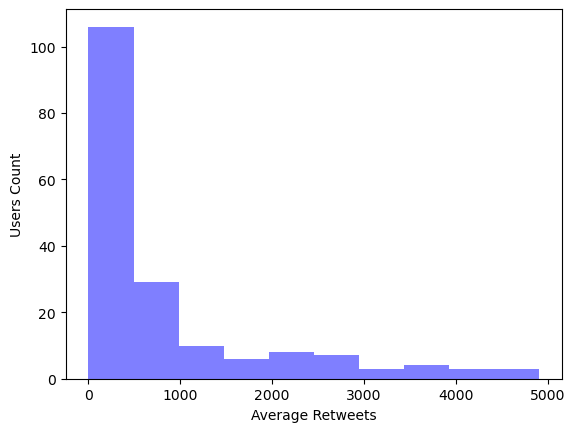

In [7]:
plt.hist(df, facecolor='blue', alpha=0.5)
plt.xlabel('Average Retweets')
plt.ylabel('Users Count')

## Task 4

 1. Write a function that takes a user's screen_name or id and determines, using a SQL query, the number of secondary friends that user has (friends of friends).
 2. Write a couple of sentences about how this function/query would need to change if we wanted to further extend the number of hops or tertiary/etc. friends we wanted to evaluate.

In [192]:
def fof(user):
    res = cursor.execute(f"""select count(distinct(screen_name)) from twitter.users as u 
    inner join twitter.friends as f on u.user_id = f.friend_id 
    inner join twitter.friends as f2 on f.user_id = f2.friend_id 
    where (f2.user_id = '{user}' or f2.user_screen_name = '{user}');""")
    get_fof = cursor.fetchall()
    return get_fof

In [193]:
fof('elonmusk')

[RealDictRow([('count', 94)])]

In [191]:
print(f"""This function used inner join to use users tables with two friends tables to get user's friends of friends.
For getting number of hops or tertiary friends, we can inner join more friends tables to get their friends of tertiary or more.
We can simply evaulate from inner join the table with user_id of previous friends table and friend_id of new friends table.""")

This function used inner join to use users tables with two friends tables to get user's friends of friends.
For getting number of hops or tertiary friends, we can inner join more friends tables to get their friends of tertiary or more.
We can simply evaulate from inner join the table with user_id of previous friends table and friend_id of new friends table.


## Task 5
Write a function that will determine, for a given user, the percentage of their favorite tweets that were made by their friends:

$$\frac{\text{# of tweets favorited by the user and made by the user's friends}}{\text{# of tweets favorited by user}}$$

_Note: # of favorited tweets should be based off of the **favorites** table, and friendship should be based off of the **friends** table_

**Hint: For user - 'elonmusk' you should get $\frac{88}{224}$ or ~39.3%**

In [2]:
def fav_percent(user):
    res = cursor.execute(f"select * from twitter.favorites where user_screen_name = '{user}'")
    fav_user = len(cursor.fetchall())
    print(fav_user)
    res2 = cursor.execute(f"""
    select * from twitter.favorites join twitter.statuses on favorites.status_id = statuses.status_id
    join twitter.friends on favorites.user_id = friends.user_id where statuses.user_id = friends.friend_id
    and (favorites.user_screen_name ='{user}' or favorites.user_id = '{user}');""")
    fav_friends = len(cursor.fetchall())
    print(fav_friends)
    percentage = print("Percentage = " + str(fav_friends/fav_user))
    return percentage

In [3]:
fav_percent('elonmusk')

224
88
Percentage = 0.39285714285714285
